# Question2

To do 
- find the best number of clusters
- try to understand what caracterize a cluster (what are their stats)
- 

In [0]:
import pandas as pd
import numpy as np
import csv


import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
import seaborn as sns

# from selenium import webdriver
# from selenium.common.exceptions import NoSuchElementException
import time
import random
import json

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.metrics import silhouette_samples, silhouette_score

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df_raw_sdg = pd.read_csv('/content/drive/My Drive/M1/Artificial Intelligence Team/Week 6 - EdTech & SDG datasets/GlobalSDG2019Data.csv', skiprows = 1)
df_raw_hdi = pd.read_csv('/content/drive/My Drive/M1/Artificial Intelligence Team/Week 6 - EdTech & SDG datasets/HDI.csv')

### 1. Load data

In [0]:
#df_raw_sdg = pd.read_csv('GlobalSDG2019Data.csv', skiprows = 1)

In [0]:
df_raw_sdg.head()

,Country,id,2019 Global Index Score (0-100),2019 Global Index Rank,Percentage missing values,Regional Score (0-100),Spillover Score (0-100),UN region name,Regions used for the SDG Index & Dashboard,Income Group in 2019,"Country is an OECD member, yes=1 no=0",Country is member of G20,Population in 2019,"GDP per capita, PPP in 2017",Goal 1 Dashboard,Goal 1 Trend,Goal 2 Dashboard,Goal 2 Trend,Goal 3 Dashboard,Goal 3 Trend,Goal 4 Dashboard,Goal 4 Trend,Goal 5 Dashboard,Goal 5 Trend,Goal 6 Dashboard,Goal 6 Trend,Goal 7 Dashboard,Goal 7 Trend,Goal 8 Dashboard,Goal 8 Trend,Goal 9 Dashboard,Goal 9 Trend,Goal 10 Dashboard,Goal 10 Trend,Goal 11 Dashboard,Goal 11 Trend,Goal 12 Dashboard,Goal 13 Dashboard,Goal 13 Trend,Goal 14 Dashboard,...,Tax Haven Score (best 0-5 worst),impute_sdg17_taxhaven,Normalized Score sdg17_taxhaven,Dashboard Color sdg17_taxhaven,OECD only: Financial Secrecy Score (best 0-100 worst),Dashboard Color sdg17_secrecy,Goal 1 Score,Goal 2 Score,Goal 3 Score,Goal 4 Score,Goal 5 Score,Goal 6 Score,Goal 7 Score,Goal 8 Score,Goal 9 Score,Goal 10 Score,Goal 11 Score,Goal 12 Score,Goal 13 Score,Goal 14 Score,Goal 15 Score,Goal 16 Score,Goal 17 Score,Goal 1 Regional Score,Goal 2 Regional Score,Goal 3 Regional Score,Goal 4 Regional Score,Goal 5 Regional Score,Goal 6 Regional Score,Goal 7 Regional Score,Goal 8 Regional Score,Goal 9 Regional Score,Goal 10 Regional Score,Goal 11 Regional Score,Goal 12 Regional Score,Goal 13 Regional Score,Goal 14 Regional Score,Goal 15 Regional Score,Goal 16 Regional Score,Goal 17 Regional Score
0,Afghanistan,AFG,49.6,153.0,11.3,70.4,94.5,Asia,E. Europe & C. Asia,LIC,0,NaN,37209007,1796.392531,gray,.,red,→,red,→,red,.,red,→,red,➚,orange,.,red,→,red,→,gray,.,red,→,green,yellow,↑,gray,...,0.0,1.0,100.0,green,NaN,NaN,NaN,42.93,38.71,23.67,21.35,39.40,56.81,43.20,4.12,NaN,34.20,98.22,96.96,NaN,52.08,46.67,41.87,95.05,55.39,77.11,89.21,59.90,72.30,87.15,70.84,32.21,68.07,76.62,78.95,87.25,40.73,66.22,69.40,69.82
1,Angola,AGO,51.3,149.0,2.4,53.8,98.6,Africa,Africa,LMIC,0,NaN,31787566,6051.579368,red,↓,red,➚,red,→,red,.,orange,→,red,→,red,➚,red,.,red,→,red,.,red,.,yellow,red,↑,red,...,0.0,1.0,100.0,green,NaN,NaN,45.16,47.78,33.74,37.84,53.57,45.96,48.75,59.88,5.65,57.18,45.96,93.66,90.89,47.84,64.97,41.72,51.91,32.67,46.64,44.50,49.36,51.58,50.75,34.94,63.25,14.56,46.61,58.92,92.10,91.09,54.51,67.74,54.20,60.89
2,Albania,ALB,70.3,60.0,1.2,70.4,89.7,Europe,E. Europe & C. Asia,UMIC,0,NaN,2938428,11802.022570,yellow,↑,red,→,orange,➚,yellow,↑,orange,➚,orange,↑,yellow,↑,red,→,orange,➚,red,.,orange,➚,yellow,orange,↑,red,...,0.0,1.0,100.0,green,NaN,NaN,96.85,46.06,82.21,93.40,53.30,77.25,88.64,62.24,27.97,59.78,78.57,83.18,92.08,40.99,79.96,67.34,64.83,95.05,55.39,77.11,89.21,59.90,72.30,87.15,70.84,32.21,68.07,76.62,78.95,87.25,40.73,66.22,69.40,69.82
3,Andorra,AND,NaN,NaN,NaN,70.4,NaN,Europe,E. Europe & C. Asia,HIC,0,NaN,77072,NaN,gray,.,yellow,.,gray,.,gray,.,yellow,.,green,↑,green,.,gray,.,orange,.,gray,.,yellow,.,gray,red,→,gray,...,0.0,1.0,NaN,green,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United Arab Emirates,ARE,69.7,65.0,9.5,65.9,47.4,Asia,MENA,HIC,0,NaN,9682088,67293.482760,gray,.,red,→,yellow,➚,yellow,.,orange,→,red,↑,yellow,➚,orange,↑,orange,↑,yellow,.,orange,.,red,red,↓,yellow,...,0.0,1.0,100.0,green,NaN,NaN,NaN,59.81,86.15,85.70,56.33,55.75,90.69,70.62,60.84,85.89,75.99,40.92,33.41,62.50,45.38,81.52,100.00,93.57,50.25,75.82,79.23,43.35,55.72,88.29,65.01,37.63,69.99,60.02,73.23,78.21,49.69,57.83,68.24,73.94


In [0]:
#df_raw_hdi = pd.read_csv('HDI.csv')
df_raw_hdi.rename(columns = {'name':'Country'}, inplace = True) 
df_raw_hdi.head()

,Country,humanDevelopmentIndex,pop2019
0,Norway,0.953,5378.857
1,Switzerland,0.944,8591.365
2,Australia,0.939,25203.198
3,Ireland,0.938,4882.495
4,Germany,0.936,83517.045


In [0]:
(df_raw_hdi.isnull().sum() / len(df_raw_hdi)) * 100

Country                  0.0
humanDevelopmentIndex    0.0
pop2019                  0.0
dtype: float64

In [0]:
df_clean = pd.DataFrame(df_raw_sdg['Country'])
df_clean['GlobalSDG'] = df_raw_sdg['2019 Global Index Score (0-100)']
df_clean['SDG1'] = df_raw_sdg['Goal 1 Score']
df_clean['SDG2'] = df_raw_sdg['Goal 2 Score']
df_clean['SDG3'] = df_raw_sdg['Goal 3 Score']
df_clean['SDG4'] = df_raw_sdg['Goal 4 Score']
df_clean['SDG5'] = df_raw_sdg['Goal 5 Score']
df_clean['SDG6'] = df_raw_sdg['Goal 6 Score']
df_clean['SDG7'] = df_raw_sdg['Goal 7 Score']
df_clean['SDG8'] = df_raw_sdg['Goal 8 Score']
df_clean['SDG9'] = df_raw_sdg['Goal 9 Score']
df_clean['SDG10'] = df_raw_sdg['Goal 10 Score']
df_clean['SDG11'] = df_raw_sdg['Goal 11 Score']
df_clean['SDG12'] = df_raw_sdg['Goal 12 Score']
df_clean['SDG13'] = df_raw_sdg['Goal 13 Score']
df_clean['SDG14'] = df_raw_sdg['Goal 14 Score']
df_clean['SDG15'] = df_raw_sdg['Goal 15 Score']
df_clean['SDG16'] = df_raw_sdg['Goal 16 Score']
df_clean['SDG17'] = df_raw_sdg['Goal 17 Score']


In [0]:
df_sdg_hdi = pd.merge(df_clean, df_raw_hdi[['humanDevelopmentIndex', 'Country']], on='Country', how='left')
df_sdg_hdi.rename(columns = {'humanDevelopmentIndex':'HDI'}, inplace = True) 

In [0]:
df_sdg_hdi

,Country,GlobalSDG,SDG1,SDG2,SDG3,SDG4,SDG5,SDG6,SDG7,SDG8,SDG9,SDG10,SDG11,SDG12,SDG13,SDG14,SDG15,SDG16,SDG17,HDI
0,Afghanistan,49.6,NaN,42.93,38.71,23.67,21.35,39.40,56.81,43.20,4.12,NaN,34.20,98.22,96.96,NaN,52.08,46.67,41.87,0.498
1,Angola,51.3,45.16,47.78,33.74,37.84,53.57,45.96,48.75,59.88,5.65,57.18,45.96,93.66,90.89,47.84,64.97,41.72,51.91,0.581
2,Albania,70.3,96.85,46.06,82.21,93.40,53.30,77.25,88.64,62.24,27.97,59.78,78.57,83.18,92.08,40.99,79.96,67.34,64.83,0.785
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.858
4,United Arab Emirates,69.7,NaN,59.81,86.15,85.70,56.33,55.75,90.69,70.62,60.84,85.89,75.99,40.92,33.41,62.50,45.38,81.52,100.00,0.863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.713
189,"Yemen, Rep.",53.7,NaN,26.29,43.84,54.52,10.39,33.46,66.39,36.48,7.17,74.08,50.43,95.49,98.43,63.74,50.99,35.76,71.90,NaN
190,South Africa,61.5,49.85,52.52,48.74,78.06,80.05,66.99,78.97,61.20,44.95,0.00,77.93,68.80,87.03,56.51,59.10,54.91,79.55,0.699
191,Zambia,52.6,13.46,42.94,46.53,62.68,63.64,52.57,43.48,67.22,16.60,16.62,63.41,89.74,98.36,NaN,70.33,45.43,46.93,0.588


In [0]:
df_raw_sdg.describe(include='all')

,Country,id,2019 Global Index Score (0-100),2019 Global Index Rank,Percentage missing values,Regional Score (0-100),Spillover Score (0-100),UN region name,Regions used for the SDG Index & Dashboard,Income Group in 2019,"Country is an OECD member, yes=1 no=0",Country is member of G20,Population in 2019,"GDP per capita, PPP in 2017",Goal 1 Dashboard,Goal 1 Trend,Goal 2 Dashboard,Goal 2 Trend,Goal 3 Dashboard,Goal 3 Trend,Goal 4 Dashboard,Goal 4 Trend,Goal 5 Dashboard,Goal 5 Trend,Goal 6 Dashboard,Goal 6 Trend,Goal 7 Dashboard,Goal 7 Trend,Goal 8 Dashboard,Goal 8 Trend,Goal 9 Dashboard,Goal 9 Trend,Goal 10 Dashboard,Goal 10 Trend,Goal 11 Dashboard,Goal 11 Trend,Goal 12 Dashboard,Goal 13 Dashboard,Goal 13 Trend,Goal 14 Dashboard,...,Tax Haven Score (best 0-5 worst),impute_sdg17_taxhaven,Normalized Score sdg17_taxhaven,Dashboard Color sdg17_taxhaven,OECD only: Financial Secrecy Score (best 0-100 worst),Dashboard Color sdg17_secrecy,Goal 1 Score,Goal 2 Score,Goal 3 Score,Goal 4 Score,Goal 5 Score,Goal 6 Score,Goal 7 Score,Goal 8 Score,Goal 9 Score,Goal 10 Score,Goal 11 Score,Goal 12 Score,Goal 13 Score,Goal 14 Score,Goal 15 Score,Goal 16 Score,Goal 17 Score,Goal 1 Regional Score,Goal 2 Regional Score,Goal 3 Regional Score,Goal 4 Regional Score,Goal 5 Regional Score,Goal 6 Regional Score,Goal 7 Regional Score,Goal 8 Regional Score,Goal 9 Regional Score,Goal 10 Regional Score,Goal 11 Regional Score,Goal 12 Regional Score,Goal 13 Regional Score,Goal 14 Regional Score,Goal 15 Regional Score,Goal 16 Regional Score,Goal 17 Regional Score
count,193,193,162.000000,162.000000,162.000000,193.000000,162.000000,193,193,193,193.000000,19.0,1.930000e+02,183.000000,193,193,193,193,193,193,193,193,193,193,193,193,193,193,193,193,193,193,193,193,193,193,193,193,193,193,...,193.000000,180.0,162.000000,193,36.000000,36,151.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,148.000000,162.000000,162.000000,162.000000,126.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
unique,193,193,NaN,NaN,NaN,NaN,NaN,6,7,4,NaN,NaN,NaN,NaN,5,5,4,4,5,4,5,5,5,5,5,5,5,5,5,4,4,4,5,5,5,5,5,5,5,4,...,NaN,NaN,NaN,4,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Tunisia,ATG,NaN,NaN,NaN,NaN,NaN,Africa,Africa,HIC,NaN,NaN,NaN,NaN,yellow,↑,red,➚,red,➚,yellow,.,orange,➚,red,→,yellow,➚,orange,↑,red,➚,red,.,orange,.,yellow,red,↑,orange,...,NaN,NaN,NaN,green,NaN,red,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,NaN,NaN,NaN,NaN,NaN,54,49,59,NaN,NaN,NaN,NaN,51,73,115,108,105,125,72,82,86,94,80,67,72,71,76,62,108,81,85,158,86,67,65,65,98,76,...,NaN,NaN,NaN,182,NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,65.987654,81.500000,4.937037,65.493782,86.100000,NaN,NaN,NaN,0.186528,1.0,3.973814e+07,18285.529847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.202073,1.0,95.432099,NaN,56.501111,NaN,74.403377,53.555926,70.038642,76.903148,60.165679,67.638395,71.127840,71.627099,35.059383,59.116419,71.812469,77.431296,86.610802,50.506587,64.806914,66.012716,64.458025,75.262716,53.555123,70.038704,76.903333,60.167099,67.638457,71.129691,71.624938,35.058395,58.997901,71.812469,77.431852,86.612778,50.307469,64.808642,66.011543,64.458580
std,NaN,NaN,10.028065,46.909487,4.862851,8.259159,15.645613,NaN,NaN,NaN,0.390546,0.0,1.465835e+08,19373.237063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.820058,0.0,17.590891,NaN,7.992259,NaN,31.495254,9.784820,20.114027,

In [0]:
len(df_sdg_hdi.dropna())

100

In [0]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

#### Correlation matrix

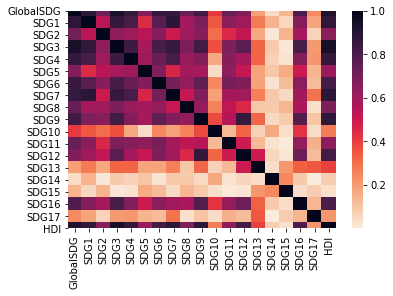

In [0]:
df_correl = df_sdg_hdi.corr(method='pearson').abs()
sns.heatmap(df_correl, 
        xticklabels=df_correl.columns,
        yticklabels=df_correl.columns, cmap=sns.cm.rocket_r)

#### Plotting all the values (per SDG)

Text(0, 0.5, 'SDG score')

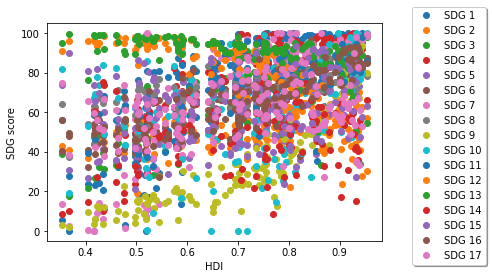

In [0]:
for i in range(1, 18):
    sdg = 'SDG' + str(i)
    plt.plot(df_sdg_hdi['HDI'], df_sdg_hdi[sdg], 'o', label='SDG '+str(i))

plt.legend(frameon=True, loc='upper center', bbox_to_anchor=(1.2, 1.1), shadow=True, ncol=1)
plt.xlabel('HDI')
plt.ylabel('SDG score')

#### Plotting all the values (per HDI)

Text(0, 0.5, 'SDG score')

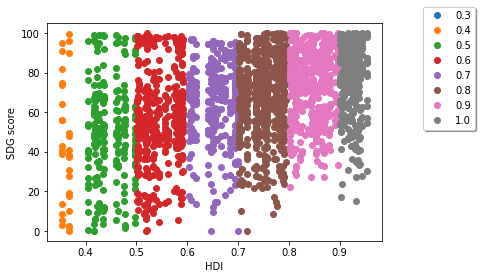

In [0]:
for i in range(3, 11):
    x=[]
    y=[]
    i = i/10
    for j in range(1, 18):
        sdg = 'SDG' + str(j)
        x = x + df_sdg_hdi[(df_sdg_hdi['HDI'] < i) & (df_sdg_hdi['HDI'] > i-0.1)]['HDI'].tolist()
        y = y + df_sdg_hdi[(df_sdg_hdi['HDI'] < i) & (df_sdg_hdi['HDI'] > i-0.1)][sdg].tolist()
    plt.plot(x, y, 'o', label=str(i))

plt.legend(frameon=True, loc='upper center', bbox_to_anchor=(1.2, 1.1), shadow=True, ncol=1)
plt.xlabel('HDI')
plt.ylabel('SDG score')

In [0]:
def kmeans_pca(n_clusters, features):
    df_model_full = df_sdg_hdi.copy()
    del df_model_full['Country']
    #features.remove('Country')
    df_model = df_model_full[features]
    df_model = df_model.dropna()
    df_hdi = df_model[['HDI']]
    del df_model['HDI']
    km = KMeans(n_clusters=n_clusters)
    results_km = km.fit_predict(df_model)
    print('Number of rows: {}'.format(len(results_km)))
    del df_model_full['HDI']
    df_plot = pd.merge(df_model, df_hdi, right_index=True, left_index=True).reset_index(drop=True)
    
    df_kmean = pd.concat([df_plot, pd.DataFrame(results_km, columns=['cluster'])], axis=1)
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
      print(df_kmean.groupby('cluster').mean())
    df_kmean.boxplot(column=['HDI'], by='cluster')
    
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(df_plot)
    principalDf = pd.DataFrame(principalComponents, columns = ['principal component 1', 'principal component 2'])
    reduiced_data = pd.concat([principalDf, pd.DataFrame(results_km, columns=['cluster'])], axis=1)

    plt.figure(figsize = (8,8))
    for j in range(0, n_clusters):
        plt.scatter(reduiced_data[reduiced_data['cluster'] == j]['principal component 1'],reduiced_data[reduiced_data['cluster'] == j]['principal component 2'], label='cluster '+str(j))
    plt.legend(frameon=True, loc='upper center', bbox_to_anchor=(1.2, 0.8), shadow=True, ncol=1)
    plt.xlabel('Principal Component 1', fontsize = 15)
    plt.ylabel('Principal Component 2', fontsize = 15)
    plt.title('2 component PCA', fontsize = 20)

In [0]:
def kmeans_optimal_k(min_n,max_n,step, features):
    x_axis = list(range(min_n,max_n,step))
    df_model_full = df_sdg_hdi.copy()
    del df_model_full['Country']
    #features.remove('Country')
    df_model = df_model_full[features]
    df_model = df_model.dropna()
    df_hdi = df_model[['HDI']]
    del df_model['HDI']
    silhouette_list = []
    for i in range(min_n, max_n, step):    
      km = KMeans(n_clusters=i)
      results_km = km.fit_predict(df_model)
      df_plot = pd.merge(df_model, df_hdi, right_index=True, left_index=True).reset_index(drop=True)
      silhouette_avg = silhouette_score(df_model, results_km)
      silhouette_list.append(silhouette_avg)
    plt.figure(figsize = (8,8))
    plt.xlabel('Number of clusters (k)', fontsize = 15)
    plt.ylabel('Silhouette coefficient', fontsize = 15)
    plt.title('Silhouette according to K', fontsize = 20)
    plt.plot(x_axis,silhouette_list)


#### 3 clusers K-means based on all SGDs
### (A Garder)

In [0]:
df_sdg_hdi.columns

Index(['Country', 'GlobalSDG', 'SDG1', 'SDG2', 'SDG3', 'SDG4', 'SDG5', 'SDG6',
       'SDG7', 'SDG8', 'SDG9', 'SDG10', 'SDG11', 'SDG12', 'SDG13', 'SDG14',
       'SDG15', 'SDG16', 'SDG17', 'HDI'],
      dtype='object')

Number of rows: 144
         GlobalSDG       HDI
cluster                     
0        66.556716  0.728328
1        51.290909  0.490061
2        77.063636  0.863614


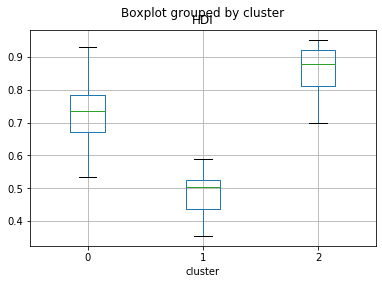

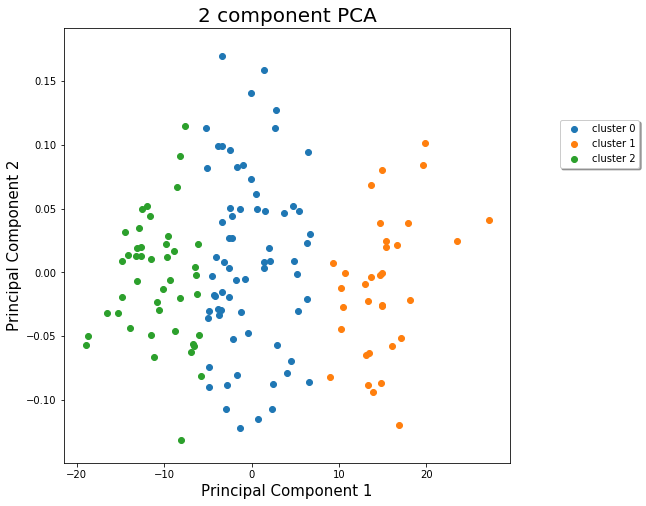

In [0]:
kmeans_pca(3, ['GlobalSDG', 'HDI'])

Number of rows: 100
              SDG1       SDG1       SDG2       SDG3       SDG4       SDG5  \
cluster                                                                     
0        89.020612  89.020612  52.990612  73.831429  84.722653  61.258980   
1        36.467826  36.467826  45.544783  45.371304  46.724783  45.908696   
2        99.138929  99.138929  62.065000  93.193929  95.775000  76.470000   

              SDG6       SDG7       SDG8       SDG9      SDG10      SDG11  \
cluster                                                                     
0        70.685510  82.024490  72.857347  32.635918  49.091020  77.193265   
1        49.218261  33.516957  64.732174  12.355652  57.636957  55.054348   
2        86.472857  93.097500  81.775000  69.120714  77.797500  84.324643   

             SDG12      SDG13      SDG14      SDG15      SDG16      SDG17  \
cluster                                                                     
0        82.067755  89.073265  48.865510  60.288980  6

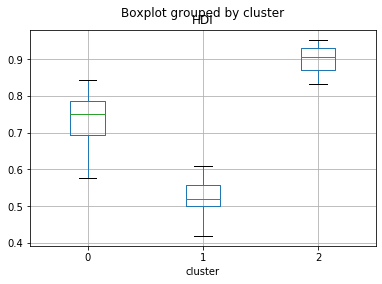

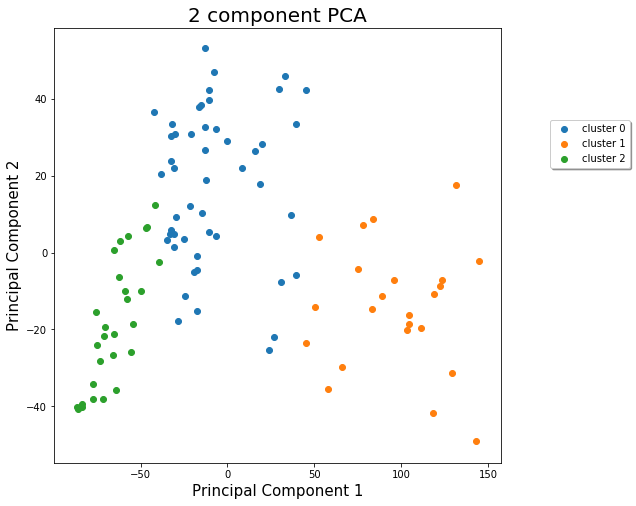

In [0]:
kmeans_pca(3, ['SDG1','SDG1', 'SDG2', 'SDG3', 'SDG4', 'SDG5', 'SDG6',
       'SDG7', 'SDG8', 'SDG9', 'SDG10', 'SDG11', 'SDG12', 'SDG13', 'SDG14',
       'SDG15', 'SDG16', 'SDG17', 'HDI'])

Number of rows: 135
              SDG1       SDG2       SDG3       SDG4       SDG5       SDG6  \
cluster                                                                     
0        86.848406  52.970145  72.454783  84.245797  60.531159  69.653913   
1        25.938750  46.042813  41.924062  41.485000  48.832813  47.819687   
2        99.194412  62.711176  93.340588  95.822647  76.498529  87.777059   

              SDG7       SDG8       SDG9      SDG11      SDG12      SDG16  \
cluster                                                                     
0        80.484928  72.350145  30.046232  75.602464  82.755072  64.918696   
1        24.538750  62.629063  11.283750  54.670938  94.726562  52.637187   
2        92.581176  81.356471  70.237059  85.530588  49.480588  83.799412   

              HDI  
cluster            
0        0.720913  
1        0.490656  
2        0.902147  


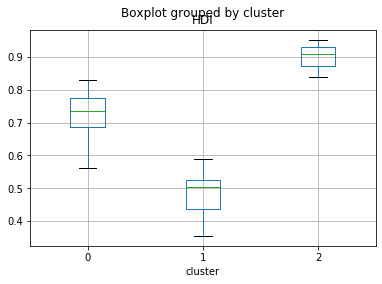

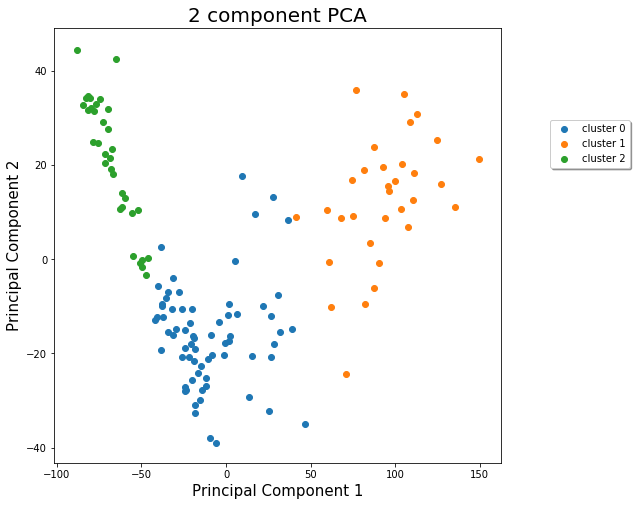

In [0]:
kmeans_pca(3, ['SDG1', 'SDG2', 'SDG3', 'SDG4', 'SDG5', 'SDG6',
       'SDG7', 'SDG8', 'SDG9', 'SDG11', 'SDG12', 'SDG16', 'HDI'])

Number of rows: 101
             SDG10      SDG13      SDG14      SDG15      SDG17       HDI
cluster                                                                 
0        71.718409  89.206818  53.256136  73.823409  59.232500  0.752386
1        75.123478  80.332609  37.479130  49.767391  75.368261  0.746174
2        32.702353  90.729706  56.377059  62.992059  62.239412  0.699088


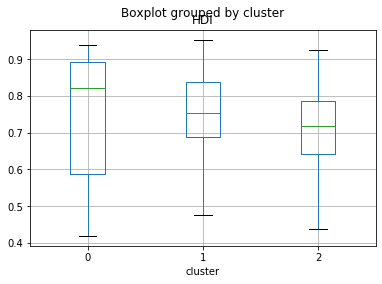

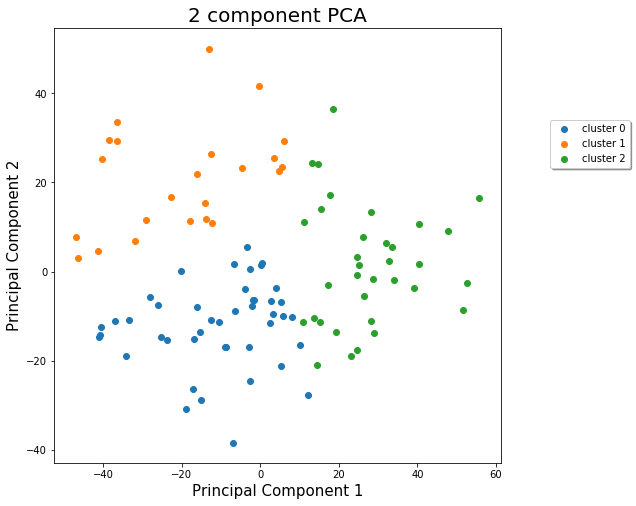

In [0]:
kmeans_pca(3, ['SDG10', 'SDG13', 'SDG14', 'SDG15', 'SDG17', 'HDI'])

#### 4 clusers K-means based on the Global SGD score

In [0]:
kmeans_pca(4, ['HDI', 'GlobalSDG'])

ValueError: ignored

In [0]:
kmeans_pca(3, ['SDG1', 'SDG2', 'SDG3', 'SDG4', 'SDG5', 'SDG6', 'SDG7', 'SDG8', 'SDG9', 'HDI'])

ValueError: ignored

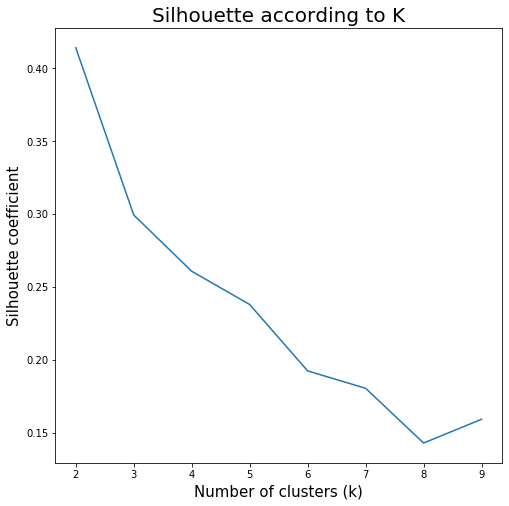

In [0]:
kmeans_optimal_k(2,10,1,['SDG1','SDG1', 'SDG2', 'SDG3', 'SDG4', 'SDG5', 'SDG6',
       'SDG7', 'SDG8', 'SDG9', 'SDG10', 'SDG11', 'SDG12', 'SDG13', 'SDG14',
       'SDG15', 'SDG16', 'SDG17', 'HDI'])